zad1

In [ ]:
import pandas as pd

def wczytaj_dane_csv(sciezka):

    dane = pd.read_csv(sciezka)


    dane['Data'] = pd.to_datetime(dane['Data'])


    dane.set_index('Data', inplace=True)


    return dane[['Temperatura']]


sciezka = r"/content/dane.csv"


ramka_danych = wczytaj_dane_csv(sciezka)


print(ramka_danych)


            Temperatura
Data                   
2024-01-01          1.8
2024-01-02         -0.4
2024-01-03          0.3
2024-01-04         -2.8
2024-01-05         -1.4
...                 ...
2024-12-27          1.1
2024-12-28         -3.6
2024-12-29          2.7
2024-12-30         -3.5
2024-12-31         -2.8

[366 rows x 1 columns]


zad2



In [ ]:
import pandas as pd
import numpy as np

def statystyki_temperatury(sciezka):
    dane = pd.read_csv(sciezka)


    dane['Data'] = pd.to_datetime(dane['Data'])
    dane.set_index('Data', inplace=True)


    temperatura = dane['Temperatura']


    srednia = temperatura.mean()
    mediana = temperatura.median()
    odchylenie_std = temperatura.std()
    min_wartosc = temperatura.min()
    max_wartosc = temperatura.max()


    return (srednia, mediana, odchylenie_std, min_wartosc, max_wartosc)


sciezka = r"/content/dane.csv"


wyniki = statystyki_temperatury(sciezka)
print(wyniki)


(12.368852459016393, 12.4, 9.413689378805618, -4.9, 29.8)


zad2b

In [ ]:
import pandas as pd
import numpy as np

def przypisz_pory_roku(data):
    rok = data.year
    wiosna_start = pd.Timestamp(f'{rok}-03-21')
    lato_start = pd.Timestamp(f'{rok}-06-22')
    jesien_start = pd.Timestamp(f'{rok}-09-23')
    zima_start = pd.Timestamp(f'{rok}-12-22')

    if wiosna_start <= data < lato_start:
        return 'Spring'
    elif lato_start <= data < jesien_start:
        return 'Summer'
    elif jesien_start <= data < zima_start:
        return 'Autumn'
    else:
        return 'Winter'

def statystyki_sezonowe(sciezka):
    dane = pd.read_csv(sciezka)


    dane['Data'] = pd.to_datetime(dane['Data'])


    dane.set_index('Data', inplace=True)


    dane['Season'] = dane.index.map(przypisz_pory_roku)


    dane_sezonowe = dane.groupby('Season')['Temperatura']


    statystyki = pd.DataFrame({
        'Mean': dane_sezonowe.mean(),
        'Median': dane_sezonowe.median(),
        'Std': dane_sezonowe.std(),
        'Min': dane_sezonowe.min(),
        'Max': dane_sezonowe.max()
    })


    statystyki = statystyki.reindex(['Spring', 'Summer', 'Autumn', 'Winter'])

    return statystyki


sciezka = r"/content/dane.csv"


wynik = statystyki_sezonowe(sciezka)
print(wynik)


             Mean  Median       Std   Min   Max
Season                                         
Spring  13.439785   11.70  6.808820   5.1  29.8
Summer  22.053763   23.00  5.389393  10.2  29.8
Autumn  11.372222   13.75  7.158809  -4.8  19.9
Winter   2.251111    1.35  5.522747  -4.9  14.8


zad3a


         Data  Temperatura
0  2024-01-01          1.8
1  2024-01-02         -0.4
2  2024-01-03          0.3
3  2024-01-04         -2.8
4  2024-01-05         -1.4


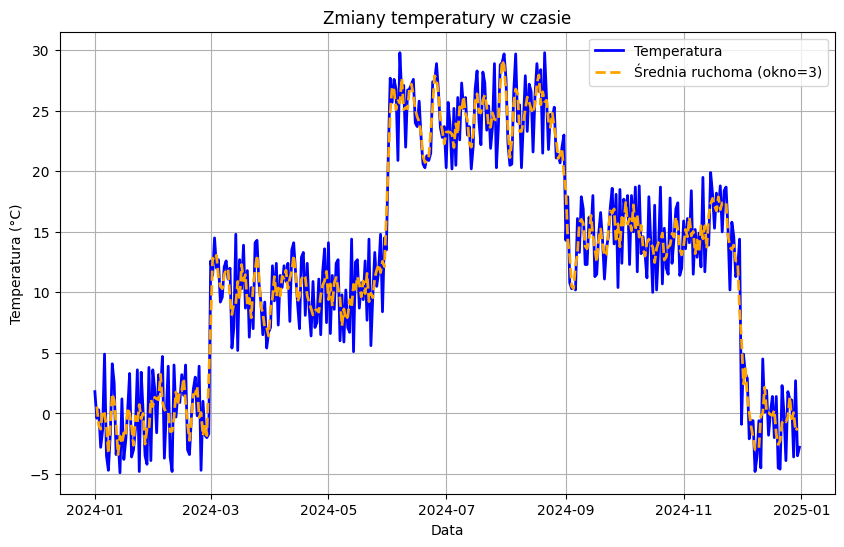

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def wykres_temperatury(sciezka, okno_rolling=3):


    dane = pd.read_csv(sciezka)


    print(dane.head())


    dane['Data'] = pd.to_datetime(dane['Data'], errors='coerce')


    if dane['Data'].isnull().any():
        print("Uwaga: Znaleziono brakujące wartości w kolumnie 'Data'")


    dane.set_index('Data', inplace=True)


    dane['Temperatura_smoothed'] = dane['Temperatura'].rolling(window=okno_rolling, center=True).mean()


    plt.figure(figsize=(10, 6))
    plt.plot(dane.index, dane['Temperatura'], label='Temperatura', color='blue', linewidth=2)
    plt.plot(dane.index, dane['Temperatura_smoothed'], label=f'Średnia ruchoma (okno={okno_rolling})', linestyle='--', color='orange', linewidth=2)


    plt.title('Zmiany temperatury w czasie')
    plt.xlabel('Data')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)


    plt.show()


sciezka = r"/content/dane.csv"
wykres_temperatury(sciezka, okno_rolling=3)


zad3b

         Data  Temperatura
0  2024-01-01          1.8
1  2024-01-02         -0.4
2  2024-01-03          0.3
3  2024-01-04         -2.8
4  2024-01-05         -1.4


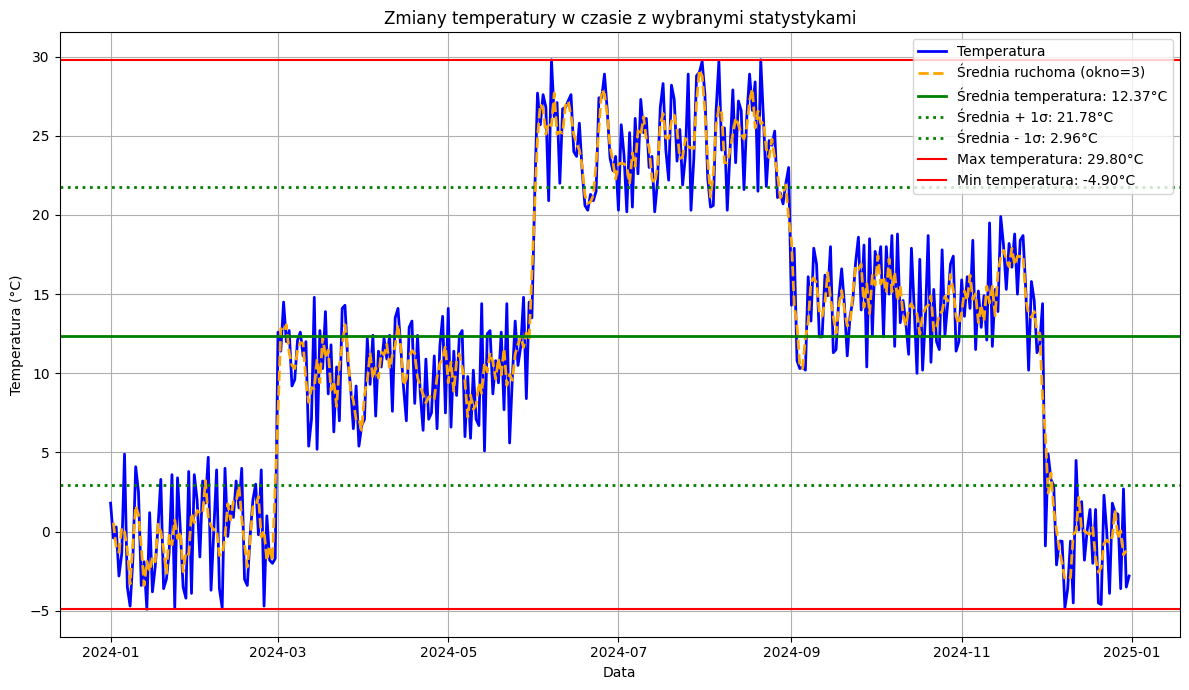

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def wykres_temperatury_ze_statystykami(sciezka, okno_rolling=3):

    dane = pd.read_csv(sciezka)


    print(dane.head())


    dane['Data'] = pd.to_datetime(dane['Data'], errors='coerce')


    if dane['Data'].isnull().any():
        print("Uwaga: Znaleziono brakujące wartości w kolumnie 'Data'")


    dane.set_index('Data', inplace=True)


    dane['Temperatura_smoothed'] = dane['Temperatura'].rolling(window=okno_rolling, center=True).mean()


    srednia = dane['Temperatura'].mean()
    odchylenie_std = dane['Temperatura'].std()
    temp_min = dane['Temperatura'].min()
    temp_max = dane['Temperatura'].max()


    plt.figure(figsize=(12, 7))
    plt.plot(dane.index, dane['Temperatura'], label='Temperatura', color='blue', linewidth=2)
    plt.plot(dane.index, dane['Temperatura_smoothed'], label=f'Średnia ruchoma (okno={okno_rolling})', linestyle='--', color='orange', linewidth=2)


    plt.axhline(y=srednia, color='green', linestyle='-', linewidth=2, label=f'Średnia temperatura: {srednia:.2f}°C')
    plt.axhline(y=srednia + odchylenie_std, color='green', linestyle=':', linewidth=2, label=f'Średnia + 1σ: {srednia + odchylenie_std:.2f}°C')
    plt.axhline(y=srednia - odchylenie_std, color='green', linestyle=':', linewidth=2, label=f'Średnia - 1σ: {srednia - odchylenie_std:.2f}°C')
    plt.axhline(y=temp_max, color='red', linestyle='-', linewidth=1.5, label=f'Max temperatura: {temp_max:.2f}°C')
    plt.axhline(y=temp_min, color='red', linestyle='-', linewidth=1.5, label=f'Min temperatura: {temp_min:.2f}°C')


    plt.title('Zmiany temperatury w czasie z wybranymi statystykami')
    plt.xlabel('Data')
    plt.ylabel('Temperatura (°C)')
    plt.legend(loc='upper right')
    plt.grid(True)


    plt.tight_layout()
    plt.show()


sciezka = r"/content/dane.csv"
wykres_temperatury_ze_statystykami(sciezka, okno_rolling=3)


zad3c

         Data  Temperatura
0  2024-01-01          1.8
1  2024-01-02         -0.4
2  2024-01-03          0.3
3  2024-01-04         -2.8
4  2024-01-05         -1.4


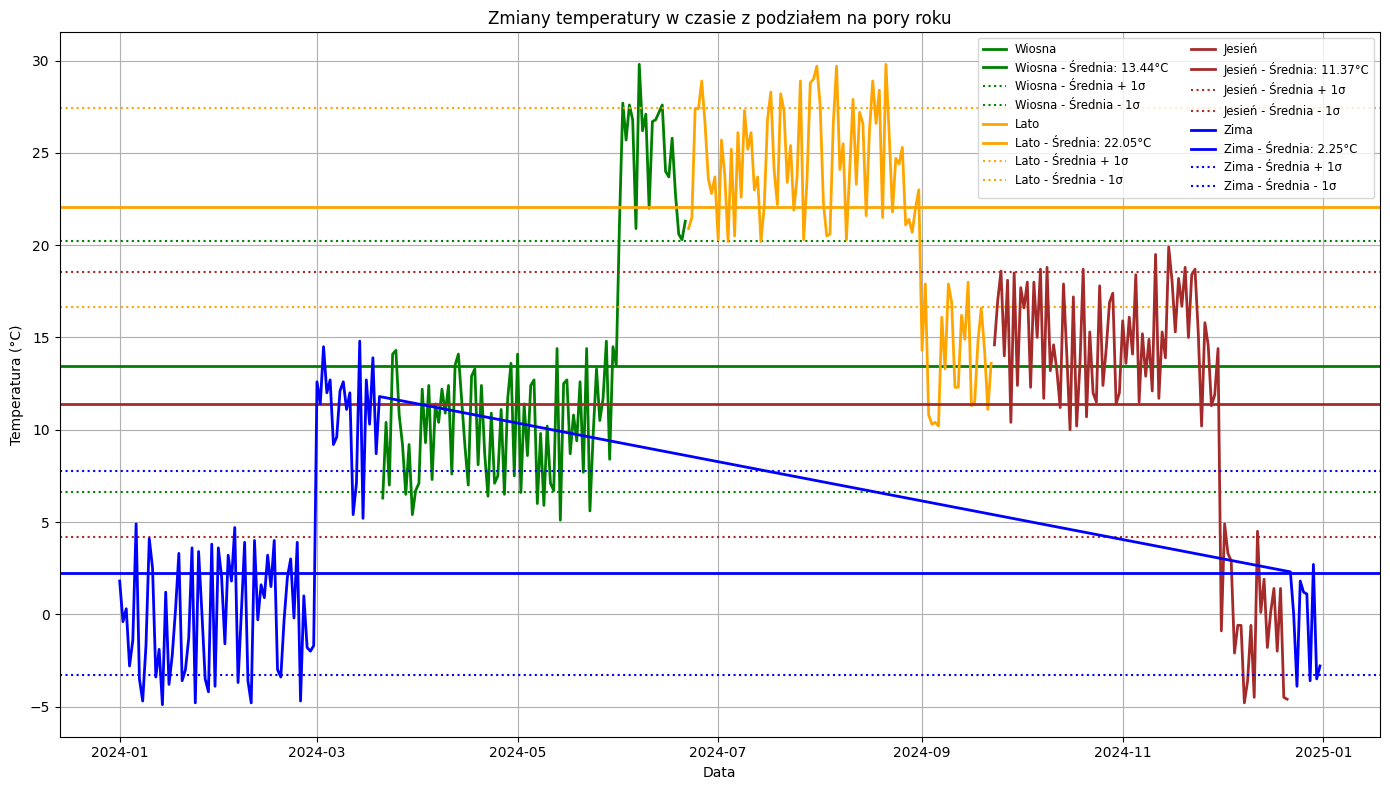

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def przypisz_pore_roku(data):
    if data.month == 3 and data.day >= 21 or data.month in [4, 5] or (data.month == 6 and data.day < 22):
        return 'Wiosna'
    elif data.month == 6 and data.day >= 22 or data.month in [7, 8] or (data.month == 9 and data.day < 23):
        return 'Lato'
    elif data.month == 9 and data.day >= 23 or data.month in [10, 11] or (data.month == 12 and data.day < 22):
        return 'Jesień'
    else:
        return 'Zima'

def wykres_temperatury_pory_roku(sciezka):
    dane = pd.read_csv(sciezka)


    print(dane.head())

    dane['Data'] = pd.to_datetime(dane['Data'], errors='coerce')
    dane['Pora_roku'] = dane['Data'].apply(przypisz_pore_roku)

    dane.set_index('Data', inplace=True)

    plt.figure(figsize=(14, 8))

    kolory = {
        'Wiosna': 'green',
        'Lato': 'orange',
        'Jesień': 'brown',
        'Zima': 'blue'
    }

    for pora_roku, kolor in kolory.items():
        dane_pora_roku = dane[dane['Pora_roku'] == pora_roku]

        plt.plot(dane_pora_roku.index, dane_pora_roku['Temperatura'], label=pora_roku, color=kolor, linewidth=2)

        srednia = dane_pora_roku['Temperatura'].mean()
        odchylenie_std = dane_pora_roku['Temperatura'].std()

        plt.axhline(y=srednia, color=kolor, linestyle='-', linewidth=2, label=f'{pora_roku} - Średnia: {srednia:.2f}°C')
        plt.axhline(y=srednia + odchylenie_std, color=kolor, linestyle=':', linewidth=1.5, label=f'{pora_roku} - Średnia + 1σ')
        plt.axhline(y=srednia - odchylenie_std, color=kolor, linestyle=':', linewidth=1.5, label=f'{pora_roku} - Średnia - 1σ')

    plt.title('Zmiany temperatury w czasie z podziałem na pory roku')
    plt.xlabel('Data')
    plt.ylabel('Temperatura (°C)')
    plt.legend(loc='upper right', ncol=2, fontsize='small')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


sciezka = r"/content/dane.csv"
wykres_temperatury_pory_roku(sciezka)



zad3d

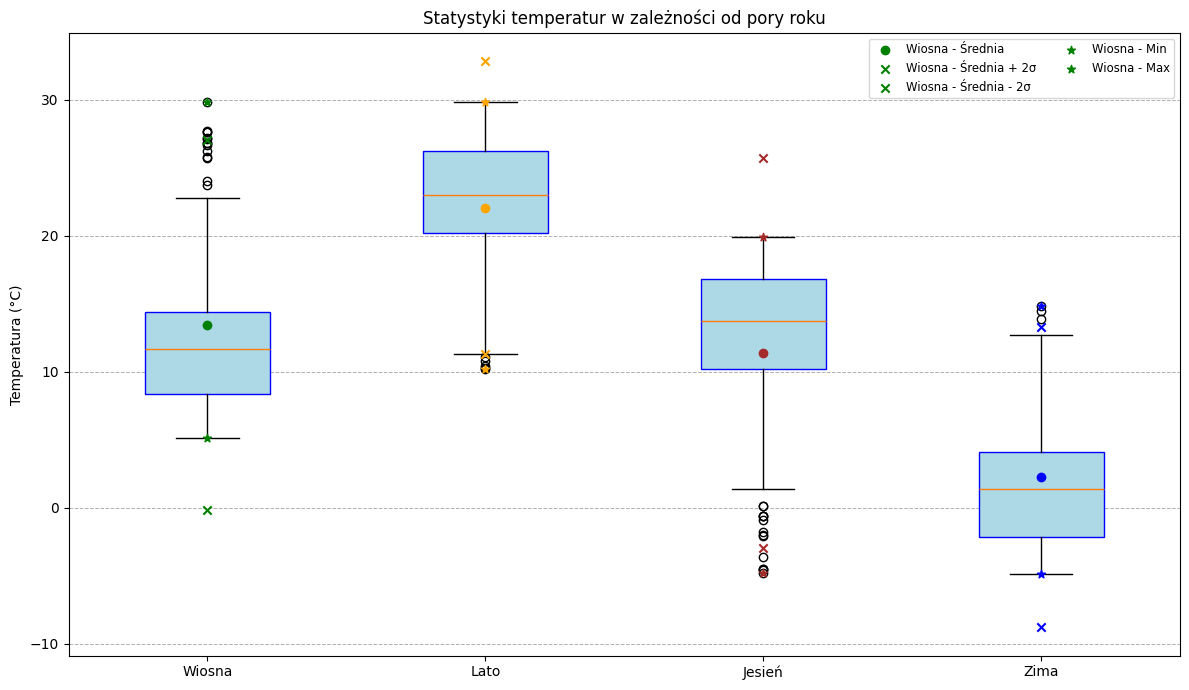

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def przypisz_pore_roku(data):
    if data.month == 3 and data.day >= 21 or data.month in [4, 5] or (data.month == 6 and data.day < 22):
        return 'Wiosna'
    elif data.month == 6 and data.day >= 22 or data.month in [7, 8] or (data.month == 9 and data.day < 23):
        return 'Lato'
    elif data.month == 9 and data.day >= 23 or data.month in [10, 11] or (data.month == 12 and data.day < 22):
        return 'Jesień'
    else:
        return 'Zima'

def wykres_statystyk_pory_roku(sciezka):

    dane = pd.read_csv(sciezka)

    dane['Data'] = pd.to_datetime(dane['Data'])
    dane['Pora_roku'] = dane['Data'].apply(przypisz_pore_roku)

    fig, ax = plt.subplots(figsize=(12, 7))

    grupy_pory_roku = dane.groupby('Pora_roku')['Temperatura']

    dane_do_wykresu = [grupy_pory_roku.get_group(pora_roku) for pora_roku in ['Wiosna', 'Lato', 'Jesień', 'Zima']]
    ax.boxplot(dane_do_wykresu, labels=['Wiosna', 'Lato', 'Jesień', 'Zima'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))

    kolory = ['green', 'orange', 'brown', 'blue']

    for i, pora_roku in enumerate(['Wiosna', 'Lato', 'Jesień', 'Zima']):
        dane_pora_roku = grupy_pory_roku.get_group(pora_roku)

        srednia = dane_pora_roku.mean()
        odchylenie_std = dane_pora_roku.std()
        min_wartosc = dane_pora_roku.min()
        max_wartosc = dane_pora_roku.max()

        pozycja = i + 1

        ax.scatter(pozycja, srednia, color=kolory[i], marker='o', label=f'{pora_roku} - Średnia' if i == 0 else "", zorder=3)

        ax.scatter(pozycja, srednia + 2 * odchylenie_std, color=kolory[i], marker='x', label=f'{pora_roku} - Średnia + 2σ' if i == 0 else "", zorder=3)
        ax.scatter(pozycja, srednia - 2 * odchylenie_std, color=kolory[i], marker='x', label=f'{pora_roku} - Średnia - 2σ' if i == 0 else "", zorder=3)

        ax.scatter(pozycja, min_wartosc, color=kolory[i], marker='*', label=f'{pora_roku} - Min' if i == 0 else "", zorder=3)
        ax.scatter(pozycja, max_wartosc, color=kolory[i], marker='*', label=f'{pora_roku} - Max' if i == 0 else "", zorder=3)

    ax.set_title('Statystyki temperatur w zależności od pory roku')
    ax.set_ylabel('Temperatura (°C)')
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

    ax.legend(loc='upper right', fontsize='small', ncol=2)

    plt.tight_layout()
    plt.show()


sciezka = r"/content/dane.csv"


wykres_statystyk_pory_roku(sciezka)
